# Homework #1 - Walid Ajbar, Arya Jakkli, Alen Rostomyan

##### This notebook analyses two datasets to obtain a visual representation of the evolution of the global surface temperature of the earth as a set of colour stripes.

### Data set
Two CSV files, NoMon.csv for the northern hemisphere, SoMon.csv for the southern hemisphere are deposited in the same directory as the notebook\
Column A is the  month, column B is the temperature anomaly in °C (difference between the world's average surface temperature for the month and the average surface temperature in 1961-1990.) Columns C and D are the lower and upper boundaries of the confidence interval and are not used here.

#### Loading packages

In [1]:
# Relevant packages
import matplotlib.pyplot as plt
import pandas as pd

### Loading and Processing Data

#### Loading the two datasets and checking for missing or incorrect data

In [2]:
# Loading data
north_data = pd.read_csv('NoMon.csv')
south_data = pd.read_csv('SoMon.csv')

# Drop unused data
useful_columns = ['Time', 'Anomaly (deg C)']

north_data = north_data[useful_columns]
south_data = south_data[useful_columns]

# Check for missing values
print(north_data.isnull().sum())
print(south_data.isnull().sum())



Time               0
Anomaly (deg C)    0
dtype: int64
Time               0
Anomaly (deg C)    0
dtype: int64


### Combining the Data to Obtain a Global Average Temperature Anomaly for each year from 1850-2023

In [3]:
# Extract the year from the 'Month' column
north_data['Year'] = pd.to_datetime(north_data['Time']).dt.year
south_data['Year'] = pd.to_datetime(south_data['Time']).dt.year

# Group by year and calculate the mean temperature anomaly for each year
northern_yearly_avg = north_data.groupby('Year')['Anomaly (deg C)'].mean().reset_index()
southern_yearly_avg = south_data.groupby('Year')['Anomaly (deg C)'].mean().reset_index()

# Merge the two dataframes on 'Year' and calculate the global average temperature anomaly
global_yearly_avg = pd.merge(northern_yearly_avg, southern_yearly_avg, on='Year', suffixes=('_north', '_south'))

# Calculate the global average temperature anomaly for each year
global_yearly_avg['GlobalAverageAnomaly'] = (global_yearly_avg['Anomaly (deg C)_north'] + global_yearly_avg['Anomaly (deg C)_south']) / 2

# Display the result (global average temperature anomalies for each year)
global_yearly_avg.head()

,Year,Anomaly (deg C)_north,Anomaly (deg C)_south,GlobalAverageAnomaly
0,1850,-0.435896,-0.399526,-0.417711
1,1851,-0.219249,-0.247451,-0.233350
2,1852,-0.235702,-0.223096,-0.229399
3,1853,-0.245392,-0.295317,-0.270354
4,1854,-0.174690,-0.408352,-0.291521


### Converting Input Temperature Anomalies into Corresponding Colour Codes

#### Establishing a Colour Palette

In [4]:
palette = ['#000759', '#020b6b', '#0c189c', '#1523c0', '#1a2be9', '#1e30fb', '#1e54fb', '#1e71fb', '#1e91fb', '#1eb2fb', 
           '#ff779b', '#f45672', '#ec3656', '#ea1e42', '#e21035', '#d50227', '#cc0113', '#b90111', '#a50110', '#8c010d']

#### Function for Converting Temperature Anomaly into Corresponding Colour Code

In [5]:
min_temp_anomaly = min(global_yearly_avg['GlobalAverageAnomaly'])
max_temp_anomaly = max(global_yearly_avg['GlobalAverageAnomaly'])

print(min_temp_anomaly)
print(max_temp_anomaly)

def temperature_to_colour(anomaly, palette): 
    ### Takes a temperature anomaly value and the colour palette and returns the corresponding colour code

    # Ensure that the anomaly is within the min-max range
    anomaly = max(min_temp_anomaly, min(max_temp_anomaly, anomaly))
    
    # Normalise the anomaly between 0 and 1
    normalised_anomaly = (anomaly - min_temp_anomaly) / (max_temp_anomaly - min_temp_anomaly)
    
    # Scale the normalized anomaly to the size of the palette
    palette_index = int(normalised_anomaly * (len(palette) - 1))
    
    # Return the corresponding colour code from the palette
    return palette[palette_index]


-0.5975110558333333
1.1808074808333333


### Plotting the Combined Dataset as a Stripes Representation

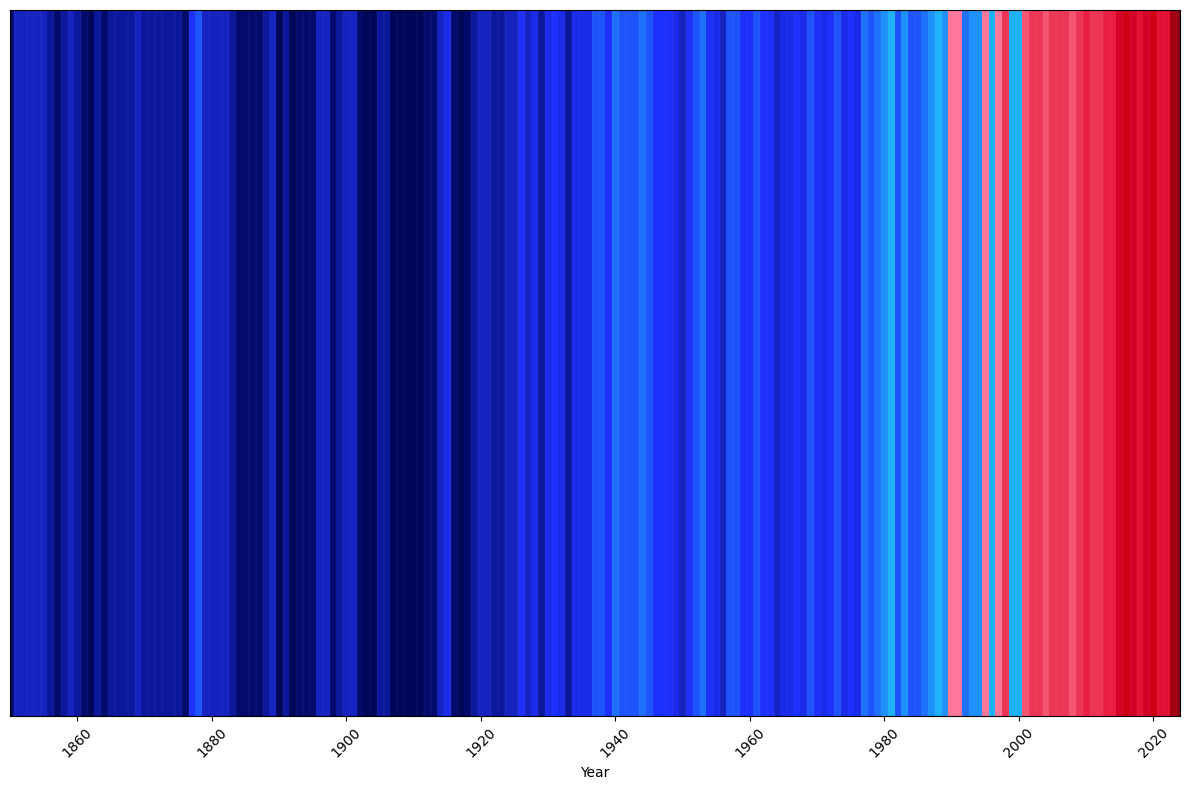

In [6]:
# Create a list of colours corresponding to each year's temperature anomaly
colours = [temperature_to_colour(temp, palette) for temp in global_yearly_avg['GlobalAverageAnomaly']]

# Plot the stripes
plt.figure(figsize=(12, 8))  # Create a wide and short figure for stripe plot

# Plot each year as a stripe (vertical bar)
for i, year in enumerate(global_yearly_avg['Year']):
    plt.axvline(x=year, color=colours[i], linewidth=5)  # Draw a vertical line for each year

# Adjust x-axis to display years correctly
plt.xlim(global_yearly_avg['Year'].min(), global_yearly_avg['Year'].max())
plt.xticks(rotation=45)

# Display axis labels
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')

# Remove y-axis and ticks to give a cleaner look
plt.gca().yaxis.set_visible(False)
plt.gca().tick_params(axis='y', which='both', length=0)

# Show the plot
plt.tight_layout()
plt.show()